<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/Incompleto_01_Features_Mahotas_Completo_mar_04_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
!pip install mahotas

In [60]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas


Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_fev_2020/Doutorado/marquesgabi_fev_2020


In [0]:

#!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
#%cd marquesgabi_fev_2020

In [62]:

!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Cloning into 'Doutorado'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 163 (delta 4), reused 0 (delta 0), pack-reused 147
Receiving objects: 100% (163/163), 65.46 MiB | 24.15 MiB/s, done.
Resolving deltas: 100% (73/73), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_fev_2020/Doutorado/marquesgabi_fev_2020/Doutorado


In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
from scipy.integrate import simps
import re
import Go2BlackWhite
%matplotlib inline

In [0]:
Size=20 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
Propriedade='contrast' # escolher uma propriedade para o cálcul0 dos picos e outras informações

In [0]:
Transfere='Fotos9Amostras.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:
Prop=Propriedade

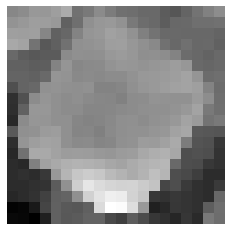

In [67]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[10], cmap = "gray")

In [68]:
Num,Row,Col=np.asarray(ww).shape
Idx=[]
New_Colunm=[]

for i in range(Num):
  Media=np.mean(ww[i])
  k=np.where(ww[i].ravel() > Media)
  Idx.append(np.asarray(k).ravel())

Quant=Size*Size
for i in Idx:
  #print(i)
  New_Colunm.append(len(i)/Quant)
print(New_Colunm)

[0.6075, 0.51, 0.4775, 0.495, 0.515, 0.57, 0.425, 0.3225, 0.5375, 0.5075, 0.5825, 0.6175, 0.565, 0.4625, 0.62, 0.63, 0.6, 0.6125, 0.495, 0.4475, 0.44, 0.5, 0.53, 0.6375, 0.5325, 0.5775, 0.4775, 0.4875, 0.535, 0.5225, 0.5225, 0.4475, 0.4625, 0.485, 0.505, 0.385, 0.4575, 0.4675, 0.525, 0.3975, 0.45, 0.3475, 0.4675, 0.465, 0.5325, 0.4, 0.565, 0.4525, 0.515, 0.5, 0.5275, 0.52, 0.425, 0.5125, 0.5075, 0.49, 0.4925, 0.46, 0.6025, 0.4775, 0.44, 0.5125, 0.395, 0.4875, 0.5625, 0.3775, 0.57, 0.49, 0.495, 0.4275, 0.405, 0.4325, 0.4625, 0.4825, 0.5525, 0.5475, 0.4325, 0.52, 0.5175, 0.4825, 0.3925, 0.5025, 0.5, 0.4575, 0.4325, 0.3375, 0.505, 0.525, 0.475, 0.5575, 0.45, 0.3125, 0.48, 0.62, 0.4675, 0.6175, 0.4175, 0.43, 0.4825, 0.4675, 0.5225, 0.4475, 0.51, 0.4975, 0.4775, 0.6525, 0.625, 0.3925, 0.465, 0.6275, 0.495, 0.3625, 0.475, 0.6375, 0.3825, 0.4725, 0.4275, 0.5975, 0.5425, 0.4875, 0.575, 0.46, 0.6425, 0.5625, 0.53, 0.39, 0.5125, 0.4975, 0.4575, 0.525, 0.3275, 0.5925, 0.5225, 0.355, 0.565, 0.4525

In [69]:
print(len(img_name))

540


In [0]:
# ww contain all photos in black and white
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)

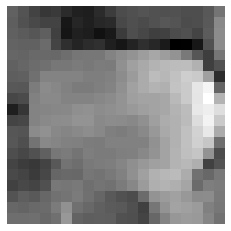

In [71]:
plt.axis("off")
plt.imshow(ww[539], cmap = "gray")

In [0]:
# Find the list elements starting with specific letter
subs = 'B'
Buraco = [x for x in img_name if re.search(subs, x)] 
subs = 'G'
Grao = [x for x in img_name if re.search(subs, x)] 
subs = 'I'
Indef = [x for x in img_name if re.search(subs, x)] 

In [73]:
# find df texture for a given picture
df=Go2Mahotas.Mahotas(ww[0],Size,Sub_Size,Crop,img_name)   # gotoMahotas junta Mahotas com outros calculos
print(df)

         ASM   constrast    correl  ...  dif entropy      IMC1      IMC2
0   0.052758  203.298611  0.152889  ...     2.785192 -0.743669  0.996773
1   0.055845   31.020833  0.342875  ...     2.670405 -0.703922  0.994526
2   0.063465   32.423611  0.190614  ...     2.681161 -0.684040  0.992619
3   0.060378   30.333333  0.339750  ...     2.689808 -0.673151  0.992236
4   0.052951   48.104167  0.265168  ...     2.868526 -0.716823  0.995305
5   0.053627   72.611111  0.489955  ...     2.917272 -0.732802  0.996253
6   0.052758   82.583333  0.578873  ...     2.880577 -0.754925  0.997102
7   0.055845   63.256944  0.537282  ...     2.764495 -0.745438  0.996544
8   0.060378   29.166667  0.147679  ...     2.434294 -0.659026  0.991375
9   0.054687   18.458333  0.080350  ...     2.547243 -0.560115  0.980686
10  0.054495   15.673611  0.542779  ...     2.613012 -0.684337  0.993240
11  0.057774   19.763889  0.511472  ...     2.635819 -0.660435  0.991557
12  0.055170   26.583333  0.614535  ...     2.60463

In [74]:
Nomes=list(df.columns)
Nomes_2=[]
for it in Nomes:
  Nomes_2.append(it)
Nomes_2.append('colors') # vai adicionar as variaveis novas 
# caso queria adicionar outra variavel alem de cor, tem que modificar
# a lista Nomes_2 com a adicao do nome da variavel a ser adicionada
print(Nomes_2)

['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 'IMC1', 'IMC2', 'colors']


In [0]:
#print(Nomes)

In [76]:
print(len(df['ASM']))

17


In [0]:
j=0
cont=-1
Posicao_Buraco=[]
Buracos=[]
for i in img_name:
  cont=cont+1
  for k in Buraco:
    if(i==k):
      Posicao_Buraco.append(cont)
      Buracos.append(0)
j=0
cont=-1
Posicao_Grao=[]
Grao=[]
for i in img_name:
  cont=cont+1
  for k in Grao:
    if(i==k):
      Posicao_Grao.append(cont)
      Grao.append(1)

j=0
cont=-1
Posicao_Indef=[]
Indef=[]
for i in img_name:
  cont=cont+1
  for k in Indef:
    if(i==k):
      Posicao_Indef.append(cont)
      Indef.append(2)

# print(Posicao_Grao)
# print(Posicao_Buraco)
# print(Posicao_Indef)

In [0]:
#for i in range(len(Posicao_Buraco)):
#for i in Posicao_Buraco:
#  print(i)

In [0]:
# compara constrast dos tres primeiros buracos

Matriz_X_Buraco=[] #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de buraco

for k in Posicao_Buraco:
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Linha=[]
  for it in Nomes:
    #print(Linha)
    #print("Nomes=",Nomes)
    #print("it=",it)
    #print(df[it])
    Linha.append(np.mean(df[it]))

  Linha.append(New_Colunm[k])
  Matriz_X_Buraco.append(Linha)
  #plt.figure(i+1)
  #plt.plot(df['constrast'])
  #print(len(Matriz_X_Buraco))
#print(pd.DataFrame(Matriz_X_Buraco)) 
#Contraste_Buraco=pd.DataFrame(Matriz_X_Buraco,columns=Nomes)
Contraste_Buraco=pd.DataFrame(Matriz_X_Buraco,columns=Nomes_2) #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de buraco, com os nomes do Índice

In [80]:
# Insert the new column at position 1.
Contraste_Buraco.insert(0,"Type",1,True)
print(Contraste_Buraco)

     Type       ASM   constrast  ...      IMC1      IMC2  colors
0       1  0.062500  220.456291  ... -0.663729  0.985292  0.5700
1       1  0.062653   35.939134  ... -0.637104  0.983396  0.4250
2       1  0.056685   94.662582  ... -0.673195  0.989868  0.4475
3       1  0.053672  364.052288  ... -0.730844  0.992383  0.4875
4       1  0.051437  196.939542  ... -0.770135  0.997371  0.5350
..    ...       ...         ...  ...       ...       ...     ...
175     1  0.054330  235.852124  ... -0.744166  0.994744  0.3800
176     1  0.069286   94.935458  ... -0.637510  0.977972  0.4475
177     1  0.053292  228.943219  ... -0.726038  0.994353  0.4575
178     1  0.053354  268.989788  ... -0.753436  0.994489  0.4975
179     1  0.065961  209.309641  ... -0.624451  0.972010  0.3700

[180 rows x 15 columns]


In [90]:
# compara constrast dos graos

Matriz_X_Grao=[] #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de grao

for k in Posicao_Grao:
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Linha=[]
  for it in Nomes:
    Linha.append(np.mean(df[it]))
    
  Linha.append(New_Colunm[k])
  Matriz_X_Grao.append(Linha)
#print(pd.DataFrame(Matriz_X_Grao))

Contraste_Grao=pd.DataFrame(Matriz_X_Grao,columns=Nomes_2) #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de grao, com os nomes do Índice

Empty DataFrame
Columns: [ASM, constrast, correl, variance, inv diff mom, sum aveg, sum var, sum entropy, entropy, dif var, dif entropy, IMC1, IMC2, colors]
Index: []


In [82]:
# Insert the new column at position 1.
Contraste_Grao.insert(0,"Type",2,True)
print(Contraste_Grao)

Empty DataFrame
Columns: [Type, ASM, constrast, correl, variance, inv diff mom, sum aveg, sum var, sum entropy, entropy, dif var, dif entropy, IMC1, IMC2, colors]
Index: []


In [0]:
# compara constrast dos indefinidos

Matriz_X_Indef=[] #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de indef

for k in Posicao_Indef:
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Linha=[]
  for it in Nomes:
    Linha.append(np.mean(df[it]))
    
  Linha.append(New_Colunm[k])
  Matriz_X_Indef.append(Linha)
Contraste_Indef=pd.DataFrame(Matriz_X_Indef,columns=Nomes_2) #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de indef, com os nomes do Índice

In [84]:
# Insert the new column at position 1.
Contraste_Indef.insert(0,"Type",3,True)
print(Contraste_Indef)

Empty DataFrame
Columns: [Type, ASM, constrast, correl, variance, inv diff mom, sum aveg, sum var, sum entropy, entropy, dif var, dif entropy, IMC1, IMC2, colors]
Index: []


In [85]:
print(Contraste_Buraco.head())

   Type       ASM   constrast  ...      IMC1      IMC2  colors
0     1  0.062500  220.456291  ... -0.663729  0.985292  0.5700
1     1  0.062653   35.939134  ... -0.637104  0.983396  0.4250
2     1  0.056685   94.662582  ... -0.673195  0.989868  0.4475
3     1  0.053672  364.052288  ... -0.730844  0.992383  0.4875
4     1  0.051437  196.939542  ... -0.770135  0.997371  0.5350

[5 rows x 15 columns]


In [86]:
print(Contraste_Grao.head())

Empty DataFrame
Columns: [Type, ASM, constrast, correl, variance, inv diff mom, sum aveg, sum var, sum entropy, entropy, dif var, dif entropy, IMC1, IMC2, colors]
Index: []


In [87]:
print(Contraste_Indef.head())

Empty DataFrame
Columns: [Type, ASM, constrast, correl, variance, inv diff mom, sum aveg, sum var, sum entropy, entropy, dif var, dif entropy, IMC1, IMC2, colors]
Index: []


In [88]:
# found drive
from google.colab import drive
drive.mount('drive')

KeyboardInterrupt: ignored

In [0]:
# get csv file
Contraste_Buraco.to_csv('Contraste_Buraco_mar_2020.csv')

In [0]:
# get csv file
Contraste_Grao.to_csv('Contraste_Grao_mar_2020.csv')

In [0]:
# get csv file
Contraste_Indef.to_csv('Contraste_Indef_mar_2020.csv')

In [0]:
# save in drive
!cp Contraste_Buraco_mar_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [0]:
# save in drive
!cp Contraste_Grao_mar_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [0]:
# save in drive
!cp Contraste_Indef_mar_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/